# Q1. 畫出 diamond shape

In [1]:
def diamond(n):
    for i in range(1,n+1):
        s=" "*(n-i)+"*"*(2*i-1)
        print(s)
    for j in range(1,n+1):
        s=" "*j+"*"*(2*n-2*j-1)
        print(s)
diamond(10)

         *
        ***
       *****
      *******
     *********
    ***********
   *************
  ***************
 *****************
*******************
 *****************
  ***************
   *************
    ***********
     *********
      *******
       *****
        ***
         *
          


# Q2. 刪除重複性的資料

In [2]:
# 讀取檔案：
f = open('symbols01.txt', 'r')
file1=f.readlines()
f.close()
f = open('symbols02.txt', 'r')
file2=f.readlines()
file=file1+file2
len(file)

722

In [3]:
#將list轉成字串並確認
file=set(file)
file=list(file)
str_convert=''.join(file)
len(file)

628

In [4]:
#匯出檔案
f = open('symbols03.txt', 'w')
f.write(str_convert)
f.close()

# Q3. 下載台灣上市公司基本資料

In [5]:
import requests
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")
r.encoding="BIG5"
data = r.text.split("\r\n")

In [6]:
from io import StringIO
import pandas as pd
data = StringIO(r.text)
df=pd.read_csv(data, skiprows=1)
df.head()

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN


# Q4. 畫出技術曲線

In [7]:
# 讀出預先下載好的股價資料
import pickle
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

In [8]:
df = data['PSC']
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-22,25.360001,25.360001,25.350000,25.350000,25.084217,205000
2016-09-23,25.350000,25.350000,25.350000,25.350000,25.084217,0
2016-09-26,25.000000,25.000000,25.000000,25.000000,24.737886,400
2016-09-27,25.000000,25.000000,25.000000,25.000000,24.737886,0
2016-09-28,25.900000,25.900000,25.059999,25.059999,24.797258,7100


# 順勢指標(CCI) 計算方式

$$ \frac{TP-MA}{MD*0.015} $$

1. TP=(當日最高價+當日最低價+當日收盤價)/3
2. MA=最近20日的收盤價平均
3. MD=最近20日離差(MA-收盤價)絕對值平均

In [9]:
#CCI順勢指標
import pandas as pd
df['TP']=(df['Close']+df['High']+df['Low'])/3
df['20MA']=pd.Series.rolling(df['Close'], window=20).mean()
df['MD']=abs(df['20MA']-df['Close'])
df['20MD']=pd.Series.rolling(df['MD'], window=20).mean()
df['CCI']=(df['TP']-df['20MA'])/(df['20MD']*0.015)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,TP,20MA,MD,20MD,CCI
Date,,,,,,,,,,,
2017-11-29,30.479000,30.479000,30.479000,30.479000,30.479000,0,30.479000,30.47900,6.394885e-14,0.152537,-2.794892e-11
2017-11-30,30.479000,30.479000,30.479000,30.479000,30.479000,0,30.479000,30.47900,6.394885e-14,0.138355,-3.081390e-11
2017-12-01,30.764999,30.764999,30.764999,30.764999,30.764999,300,30.764999,30.49330,2.716990e-01,0.138255,1.310135e+02
2017-12-04,31.054001,31.054001,31.000000,31.000000,31.000000,400,31.018000,30.51935,4.806500e-01,0.149100,2.229602e+02
2017-12-04,31.054199,31.054199,31.000000,31.000000,31.000000,369,31.018066,30.54540,4.546000e-01,0.159140,1.980087e+02


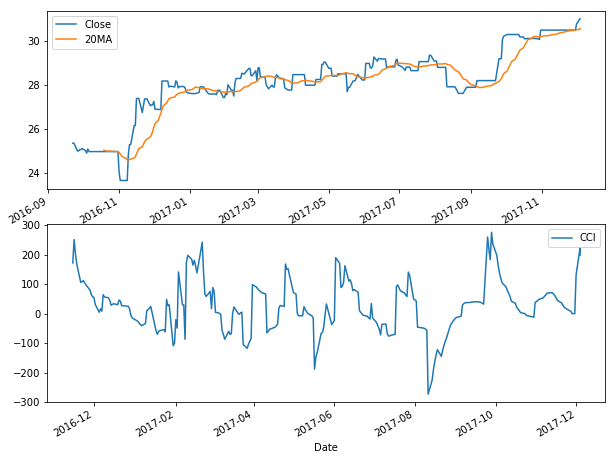

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.subplot(2,1,1)
df[['Close', '20MA']].plot(legend='best', figsize=(10,8),ax=plt.gca())
plt.subplot(2,1,2)
df['CCI'].plot(legend='best', figsize=(10,8),ax=plt.gca())

# Q5. 策略回測

In [11]:
import talib
from talib import MA_Type
import numpy as np
import ffn

In [12]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [13]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [14]:
def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [15]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [16]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [17]:
#CCI由下往上突破100，買進;由上往下突破100，賣出
def M054030031_strategy(df):
    # Donchian Channel
    df['TP']=(df['Close']+df['High']+df['Low'])/3
    df['20MA']=pd.Series.rolling(df['Close'], window=20).mean()
    df['MD']=abs(df['20MA']-df['Close'])
    df['20MD']=pd.Series.rolling(df['MD'], window=20).mean()
    df['CCI']=(df['TP']-df['20MA'])/(df['20MD']*0.015)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['CCI'][t] > df['CCI'][t-1] and df['CCI'][t] > 100:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['CCI'][t] < df['CCI'][t-1] and df['CCI'][t] < 100:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False
        elif t == (df['signals'].size-1) :
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df


In [18]:
def apply_strategy(strategy, df):
    return strategy(df)

In [19]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy,M054030031_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [20]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [21]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
73,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
17,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
74,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
67,-0.247757,-0.015649,151,0.998643,384,3,SCAC,M054030031_strategy
39,4.428078,-0.022165,64,1.052212,203,6,CSML,M054030031_strategy


In [22]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
43,3.227977,-0.283574,177,2.517655,705,7,NLNK,M054030031_strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
78,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
5,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy
